In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("heart_fail.csv")

In [129]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [130]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [131]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [133]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [134]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [135]:
df[['age', 'platelets', 'serum_creatinine']] = df[['age', 'platelets', 'serum_creatinine']].astype('int')

In [136]:
df.dtypes

age                         int32
anaemia                     int64
creatinine_phosphokinase    int64
diabetes                    int64
ejection_fraction           int64
high_blood_pressure         int64
platelets                   int32
serum_creatinine            int32
serum_sodium                int64
sex                         int64
smoking                     int64
time                        int64
DEATH_EVENT                 int64
dtype: object

In [137]:
d = {0:'No', 1:'Yes'}
df[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']] = df[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].replace(d)

In [138]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})

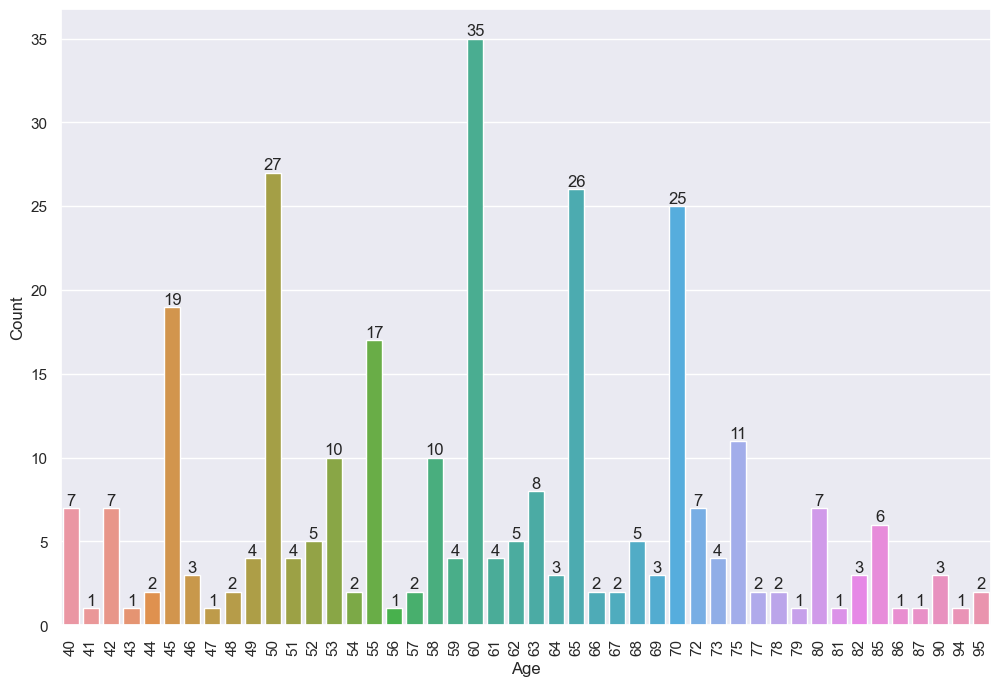

In [139]:
####  What is the distribution of age among heart failure patients in the dataset
plt.figure(figsize = (12,8))
A = sns.countplot(data = df, x = 'age')
for m in A.containers:
    A.bar_label(m)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='age', ylabel='DEATH_RATE'>

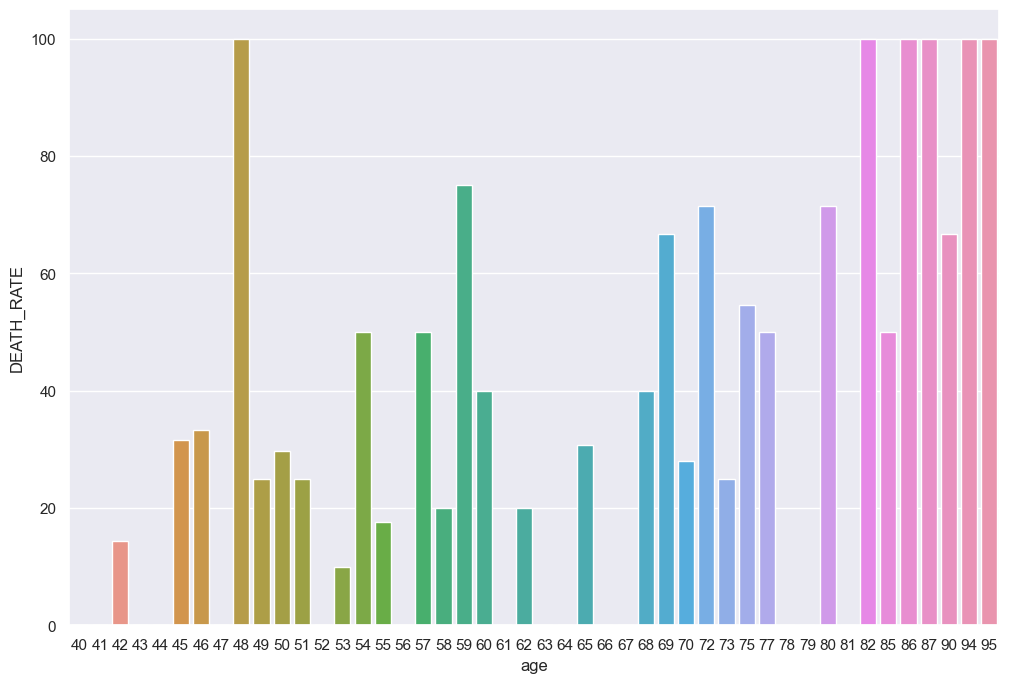

In [140]:
### How does the death rate vary with age
B = df.groupby('age')['DEATH_EVENT'].agg(['count', 'sum']).reset_index()
B['DEATH_RATE'] = (B['sum'] / B['count']) * 100
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = B, x = 'age', y = 'DEATH_RATE')

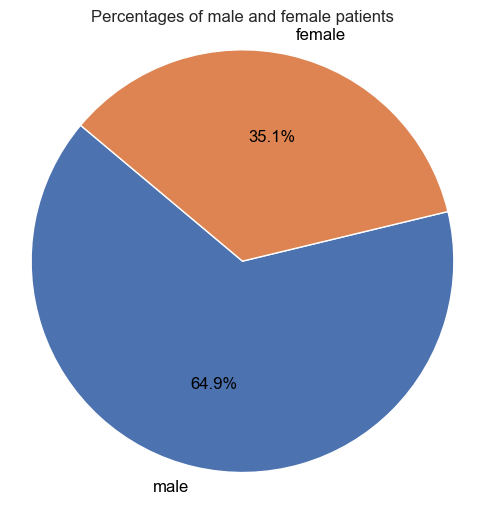

In [141]:
### What is the percentage of male and female patients in the dataset
C = df['sex'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(C, labels = C.index, autopct = '%1.1f%%', startangle = 140, textprops={'fontsize': 12, 'color': 'black'})
plt.axis('equal')
plt.ylabel('')
plt.title('Percentages of male and female patients')
plt.show()

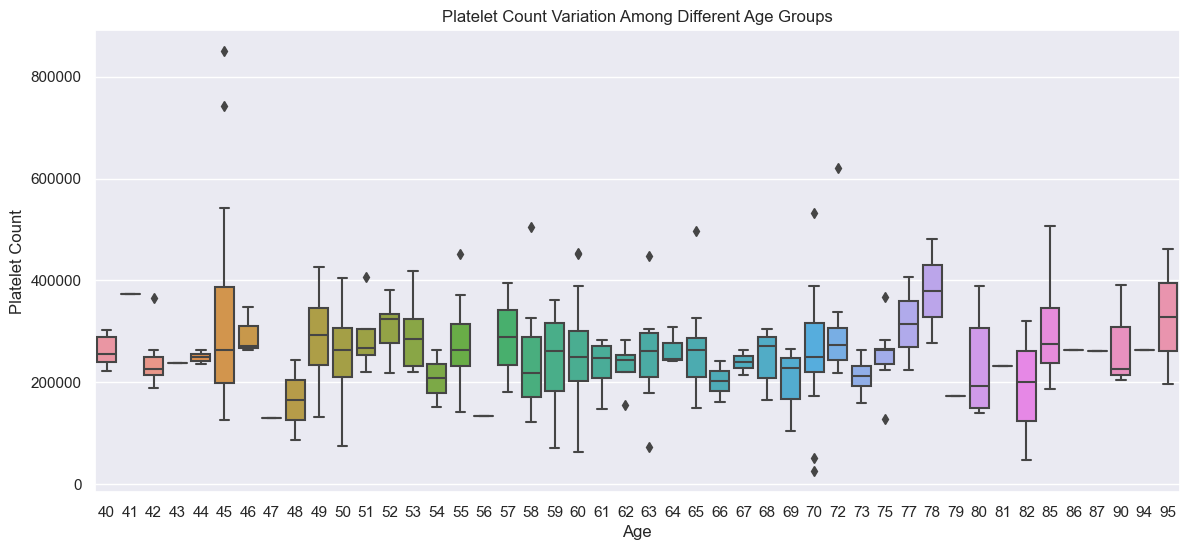

In [142]:
###  How does the platelet count vary among different age groups
plt.figure(figsize=(14, 6))
sns.boxplot(x='age', y='platelets', data=df)
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Platelet Count')
plt.show()

In [143]:
### Is there a correlation between creatinine and sodium levels in the blood
df['creatinine_phosphokinase'].corr(df['serum_sodium'])

0.05955015583372577

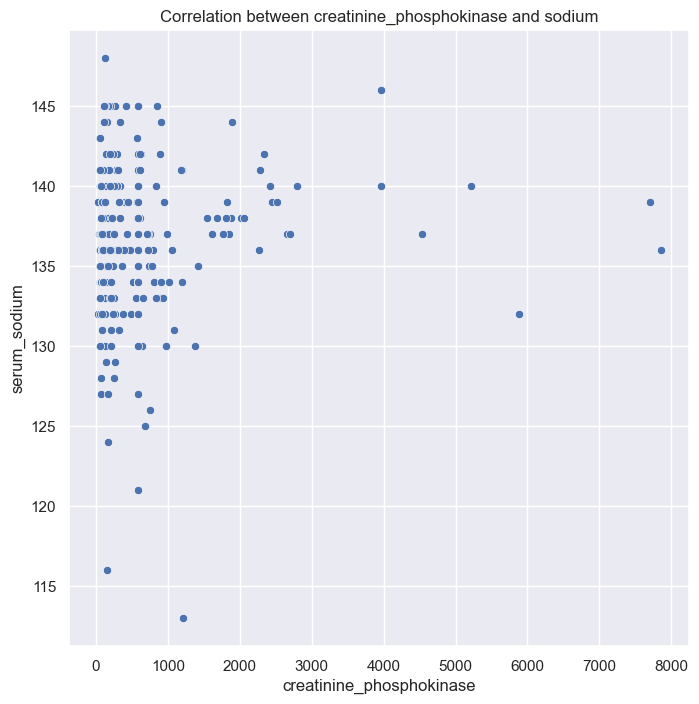

In [144]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df, x = 'creatinine_phosphokinase', y = 'serum_sodium')
plt.title('Correlation between creatinine_phosphokinase and sodium')
plt.show()

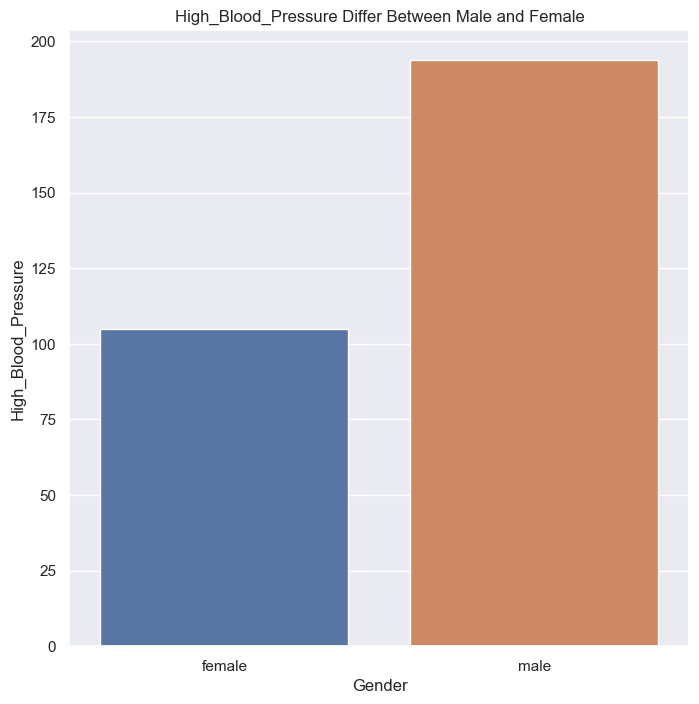

In [145]:
### How does the prevalence on high blood pressure differ between male and female patients
df1 = df.groupby('sex')['high_blood_pressure'].count().reset_index()
plt.figure(figsize = (8,8))
sns.barplot(data = df1, x = 'sex', y = 'high_blood_pressure')
plt.xlabel('Gender')
plt.ylabel('High_Blood_Pressure')
plt.title('High_Blood_Pressure Differ Between Male and Female')
plt.show()

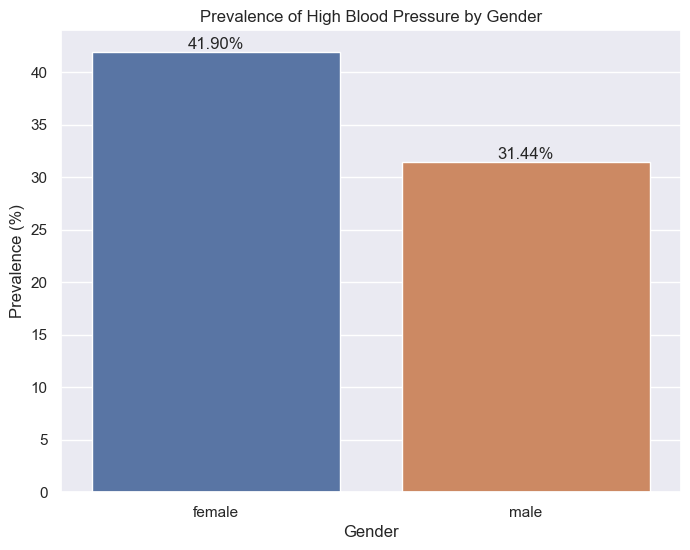

In [146]:
### How does the prevalence on high blood pressure differ between male and female patients
df['high_blood_pressure'] = df['high_blood_pressure'].map({'No':0, 'Yes':1})

high_bp_counts = df.groupby('sex')['high_blood_pressure'].sum()
total_counts = df['sex'].value_counts()
prevalence = (high_bp_counts / total_counts) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=prevalence.index, y=prevalence.values)
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
for index, value in enumerate(prevalence):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

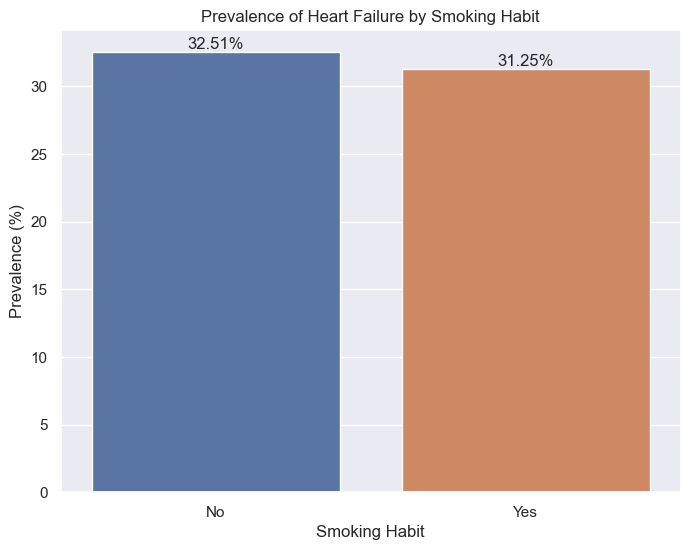

In [147]:
### What is the relationship between smoking habits and the occurrance of heart failure
smoking = df.groupby('smoking')['DEATH_EVENT'].sum()
total_counts = df['smoking'].value_counts()
prevalence = (smoking / total_counts) * 100

plt.figure(figsize = (8,6))
sns.barplot(x = prevalence.index, y = prevalence.values)
plt.title('Prevalence of Heart Failure by Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Prevalence (%)')
for index, value in enumerate(prevalence):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

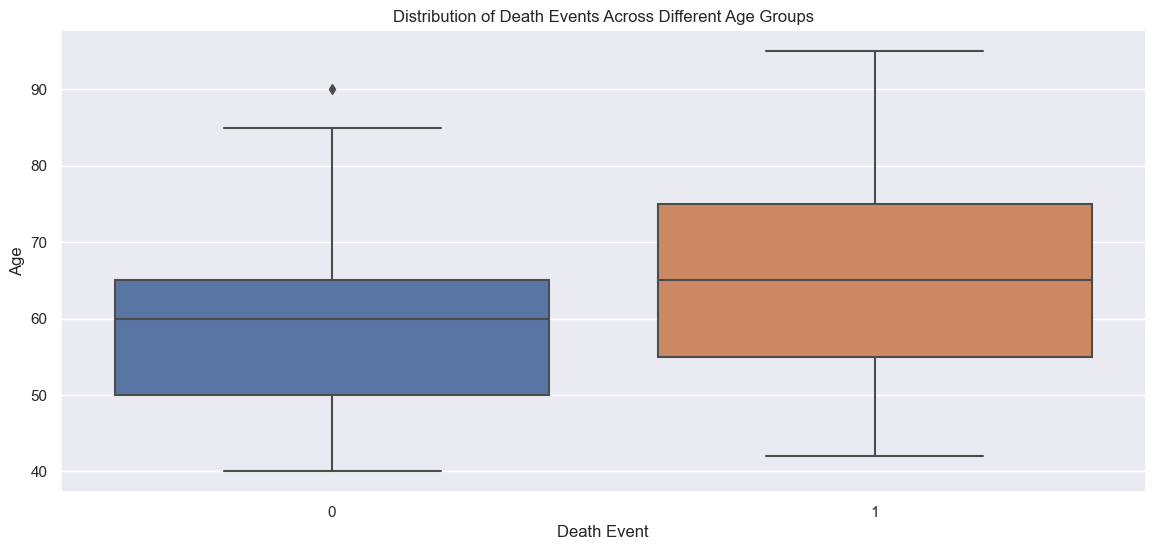

In [148]:
### Are there any noticeable patterns in the distribution of death events across different age groups
plt.figure(figsize=(14, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

In [149]:
###  Is there any significant difference in ejection fraction between patients with and without diabetes
import scipy.stats as stats

df['diabetes'] = df['diabetes'].map({'No':0, 'Yes':1})

with_diabetes = data[data['diabetes'] == 1]['ejection_fraction']
without_diabetes = data[data['diabetes'] == 0]['ejection_fraction']

t_statistic, p_value = stats.ttest_ind(with_diabetes, without_diabetes)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.08358970647234736
P-value: 0.9334389630426103


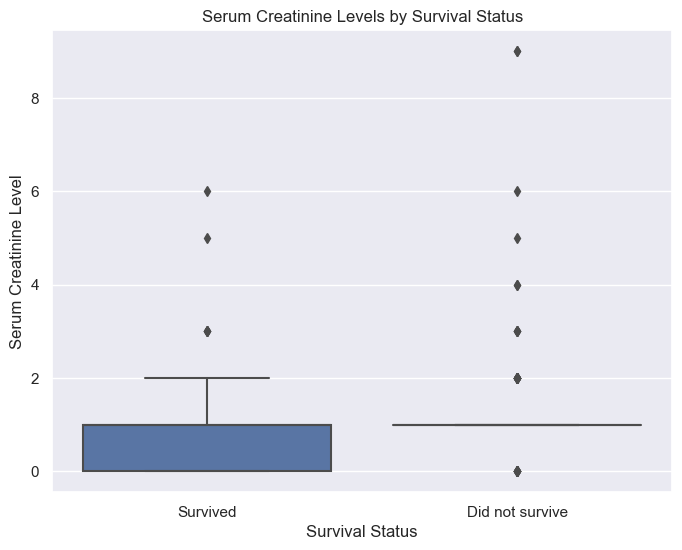

In [150]:
### How does the serum creatinine level vary between patients who survived and those who did not
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Did not survive'])
plt.show()

THANK YOU FOR GIVING THIS ASSIGNMENT